In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import HMC, MCMC

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
kernel = HMC(normal, step_size=1, trajectory_length=1)

mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)

mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:01<00:00, 727.78it/s, 1 steps of size 1.00e+00. acc. prob=0.88]


In [4]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[ 0.35469127,  1.6340383 ],
              [ 0.40106547,  2.1671536 ],
              [ 1.6320882 ,  1.4329541 ],
              ...,
              [ 0.7940427 , -0.23599976],
              [ 0.7940427 , -0.23599976],
              [ 0.6940484 , -0.1931175 ]], dtype=float32)}

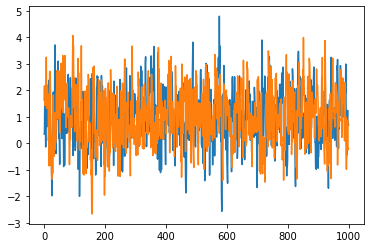

In [5]:
plt.plot(samples["theta"])

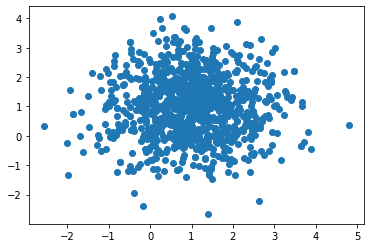

In [6]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

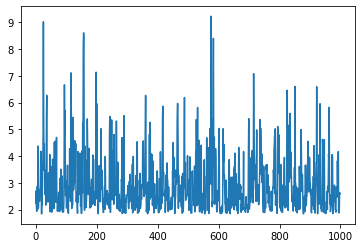

In [9]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([  0.,   1.,   5.,  14.,  19.,  34.,  84., 100., 127., 616.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

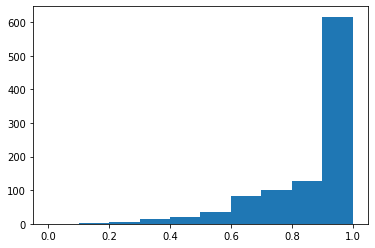

In [8]:
plt.hist(ap, range=(0,1))